In [36]:
using QuantumOptics
using LinearAlgebra
using Plots
using Random


### 2 Qubit Example

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /Users/bence/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


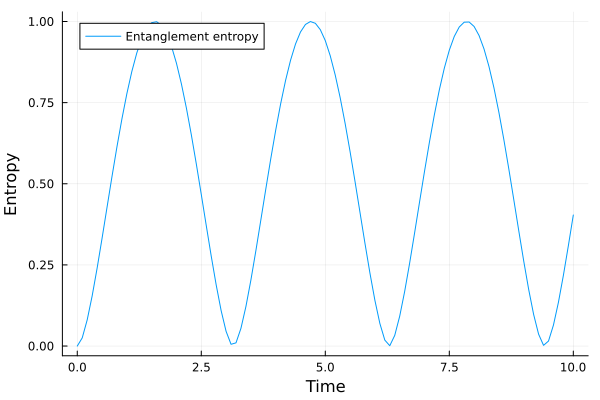

In [29]:
sigma = 0.5
tspan = [0:0.1:10;]


#* Work in spin basis
b = SpinBasis(1//2)

# Some entangling Hamiltonian
H = sigma*(sigmap(b) ⊗ sigmam(b) + sigmam(b) ⊗ sigmap(b))

psi_0 = spindown(b) ⊗ spinup(b)
# Evolved
tout, psi_t = timeevolution.schroedinger(tspan, psi_0, H)

# Reduced DMs at each time step
rho_2s = [ptrace(psi ⊗ dagger(psi), 1) for psi in psi_t]

# Von Neumann entropy
S = [entropy_vn(rho) / log(2) for rho in rho_2s]

# Plot
plot(tout, real.(S), xlabel="Time", ylabel="Entropy", label="Entanglement entropy", legend=:topleft)


### Jaynes Cummings Example is also on their website, but basically what we did for Schrödinger before, is the same but just for master equation or monte carlo. Outputs are what we expect, etc etc.

In [44]:
# Parameters
N_cutoff = 10

ωc = 0.1
ωa = 0.1
Ω = 1.

# Bases
b_fock = FockBasis(N_cutoff)
b_spin = SpinBasis(1//2)
b = b_fock ⊗ b_spin

# Fundamental operators
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

sm = sigmam(b_spin)
sp = sigmap(b_spin)
sz = sigmaz(b_spin)

# Hamiltonian
Hatom = ωa*sz/2
Hfield = ωc*n
Hint = Ω*(at⊗sm + a⊗sp)
H = one(b_fock)⊗Hatom + Hfield⊗one(b_spin) + Hint

# Initial state
α = 1.
Ψ0 = coherentstate(b_fock, α) ⊗ spindown(b_spin)

# Integration time
T = [0:0.1:20;]
T = [0.0, 0.1]
display(T)
# Schroedinger time evolution
tout, Ψt = timeevolution.schroedinger(T, Ψ0, H)

display(Ψt[2].data)

exp_n = real(expect(n ⊗ one(b_spin), Ψt))
exp_sz = real(expect(one(b_fock) ⊗ sz, Ψt))

# Plots
# plot(tout, exp_n, xlabel="Time", ylabel="Occupation number", label="Cavity")


2-element Vector{Float64}:
 0.0
 0.1

22-element Vector{ComplexF64}:
 -0.0003027588794709243 - 0.060551271161333166im
 -0.0009067323723897923 - 0.06044429054452306im
 -0.0010667407633952798 - 0.042660739753212294im
 -0.0008607110057919118 - 0.024581699614419437im
 -0.0005523163799434209 - 0.012265410694184188im
 -0.0003013382232508146 - 0.005473350624136483im
 -0.0001451160409359431 - 0.002229409114863577im
  -6.316630746383147e-5 - 0.0008406375330364291im
 -2.5261222334366423e-5 - 0.0002964747024410392im
   -9.39245242805825e-6 - 9.857028433472718e-5im
                        ⋮
     0.4245524996752924 - 0.006368765159543761im
    0.24383393666761705 - 0.0060971187022712875im
     0.1212653312727973 - 0.004246020527251178im
   0.053935312453169744 - 0.0024287286729811034im
   0.021896165259459168 - 0.001205504884759406im
   0.008228835296158888 - 0.0005356288504824905im
  0.0028924204801462354 - 0.00021733919976078586im
  0.0009584221102859024 - 8.166264497566961e-5im
  0.0003012464513880702 - 2.8704818522230695e-5im

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /Users/bence/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


2-element Vector{Float64}:
 -0.9999999899522336
 -0.9801328818919879

### Turn an array into a Qoptics Operator

In [27]:
Random.seed!(1234)
num_qubits = 10

rand_matrix = rand(ComplexF64, 2^10, 2^10)

# struct SpinBasis <: Basis
#     shape::Vector{Int}
#     SpinBasis() = new(Int[2]) # Constructor
# end

# b = GenericBasis(4)
# H = Operator(b, rand_matrix)
# display(H)
b = SpinBasis(1//2)^num_qubits
# basis_list = [b for i in 1:num_qubits]
# b = kron(basis_list...)
H = Operator(b, rand_matrix)
display(H)

Operator(dim=1024x1024)
  basis: [Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2) ⊗ Spin(1/2)]
   0.325977+0.549051im   0.637844+0.487817im   …   0.666768+0.824716im
   0.218587+0.894245im  0.0511704+0.0155122im      0.964083+0.212508im
   0.353112+0.394255im   0.795153+0.275428im       0.684914+0.674054im
   0.953125+0.795547im   0.554792+0.857315im        0.97511+0.554133im
    0.49425+0.748415im   0.678225+0.602238im       0.402213+0.0448706im
   0.578232+0.727935im   0.339166+0.642811im   …    0.70377+0.723605im
 0.00744801+0.199377im   0.493302+0.980097im       0.611679+0.0503055im
   0.439243+0.682533im   0.104536+0.141518im       0.309457+0.660317im
   0.956741+0.647855im   0.656426+0.0873079im      0.384825+0.321475im
   0.996665+0.749194im   0.274146+0.67971im        0.226514+0.0360505im
           ⋮                                   ⋱  
   0.509074+0.824601im    0.96205+0.430763im   …   0.815968+0.573313im
   0.744932+